# Supervised Learning

## Introduction

In the last chapter we looked at singular value decomposition and its applications like recommender systems. This was an example of **unsupervised** learning. Unsupervised learning is a collection of techniques in machine learning (ML) the goal of which is to extract information from unlabelled data.

## Introduction

In this chapter we look at **supervised learning**. The goal of supervised learning is to predict a label of a sample given some input data. The two main types of problems are:

1. Classification, where we try to classify the data into $n$ classes (ex. classify pictures of pets into "dog", "cat" and "other").
2. Regression, where we try to predict a continuous variable (ex. predict a price of a product given its description).

## Introduction

There is also a third paradigm called **reinforcement learning** where the goal is to learn from experience. It is used to train computer agents to perform various tasks.

## Introduction

In this chapter we will cover the main concepts of supervised learning.

To make things more interesting, we will do this by going over a possible workflow for creating a simple classification model.

## Introduction

We will use the [Titanic dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset). This dataset has info on passengers of the Titanic and whether they survived the sinking.

In [1]:
import pandas as pd

df = pd.read_csv("../data/titanic/titanic.csv", index_col="PassengerId") # Load data from csv file into a pandas dataframe
df.head(5) # Take first 5 rows from dataframe

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data

Explanation of some columns, others should be obvious:

- Survived: 1 - survived the sinking; 0 - did not
- Pclass: passenger class
- SibSp: number of siblings and spouses on the ship
- Parch: number of parents and children on the ship
- Embarked: the port that the passenger embarked from

## Objective

The goal for today is to build a model that is able to predict whether a passenger survived the sinking of the Titanic.

## Workflow

Typical workflow for a classification problem is:

1. Data exploration / cleaning.
2. Feature engineering.
3. Choosing a model and training it.
4. Evaluating the trained model and then iterating steps 2, 3 and 4.

We will now go over this step by step.

## Data exploration and cleaning

The first step is to familiarize yourself with the data. Figure out what the input data represents and then see what is going to be useful for the task at hand.

For example, in our case data is as follows:

In [2]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data exploration and cleaning

The passenger's name and ticket number is probably not going to be particularly useful when predicting whether the passenger survived. Also these columns represent text data which is a bit harder to deal with. We'll discuss how to do so in later chapters.

For now let's disregard these variables. We can then drop the columns from the dataframe.

In [3]:
df = df.drop(["Name", "Ticket"], axis=1) # axis=0 drops rows, axis=1 drops columns, default is axis=0
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S


## Data exploration and cleaning

Usually data is not perfect, for example:

1. There might duplicates, such as duplicated rows.
2. Some data points might be unknown or not exist, represented by null values in the data.
3. There might be outliers.
4. There might be illogical values due to data input errors.

The general software engineering principle of "garbage in, garbage out" applies in data science as well, so next step is to identify these problems in our dataset and mitigate them.

## Data exploration and cleaning

There are no duplicates in this dataset. Let's check for null values.

In [4]:
df.isnull().sum(axis=0)/len(df) # len(df) return the number of rows in a dataframe

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

## Data exploration and cleaning

77% of values in `Cabin` column are null. Since the vast majority of values in this column are null it will probably not be very useful to us. Especially since we have the passenger class in another column.

Let's drop this column from our dataset as well.

We'll discuss how to handle the nulls in the columns `Age` and `Embarked` a bit later.

In [5]:
df = df.drop(["Cabin"], axis=1) # axis=0 drops rows, axis=1 drops columns, default is axis=0
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S


## Data exploration and cleaning

To scan for outliers / illogical values there is a useful dataframe method `describe`. It shows the descriptive statistics of the columns.

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data exploration and cleaning

All columns except `Fare` seem to be fine. Let's plot a histogram of this column

<Axes: >

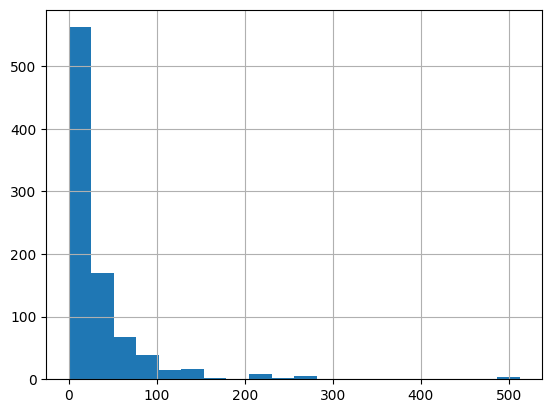

In [7]:
df["Fare"].hist(bins=20)

## Data exploration and cleaning

There are several possible ways to deal with outlier values, for example:

1. Drop them from the dataset.
2. Cap the values.
3. Replace outlier values with the mean / median.

## Data exploration and cleaning

In our case let's create a column that represent the `Fare` with outlier values capped.

In [8]:
cap = df["Fare"].quantile(0.95)
print(f"95th percentile of 'Fare': {cap}")
df["FareCapped"] = df["Fare"].clip(upper=cap)
df.describe()

95th percentile of 'Fare': 112.07915


,Survived,Pclass,Age,SibSp,Parch,Fare,FareCapped
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,27.720486
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,29.225083
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,112.079150


## Feature engineering

The inputs that go into a model are called model **features**.

**Feature engineering** is a process where you take features that you already have and try to combine them to get new ones.

For example, if your dataset had features `UnitPrice` and `UnitCost` you could define a feature
$$ProfitMargin = \frac{UnitPrice-UnitCost}{UnitPrice}.$$

## Feature engineering

When using simple models (like we'll do today) a lot of performance gains can be achieved through feature engineering.

Looking at our potential features one obvious thing to do is to sum up `SibSp` and `Parch` to get the total number of relatives on board.

In [9]:
df["NRelative"] = df["SibSp"] + df["Parch"]
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareCapped,NRelative
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,7.2500,1
2,1,1,female,38.0,1,0,71.2833,C,71.2833,1
3,1,3,female,26.0,0,0,7.9250,S,7.9250,0


## Logistic Regression

We'll use one of the simplest possible models called **logistic regression**.

If the input is given by the variable $x_1, x_2, \dots x_n$ then the output of logistic regression is given by the formula

$$
  y = \sigma(w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n),
$$
where $\sigma: \mathbb{R} \rightarrow (0, 1)$ is the logistic function (also called the sigmoid function), given by
$$
\sigma(t) = \frac{1}{1+e^{-t}}.
$$

## Logistic Regression

Here is the graph of $\sigma$:

![](../images/logisticFunction.svg){fig-align="center"}

## Logistic Regression

Logistic regression is classified as a linear model because after a change of variables the output depends on the input linearly.

The output of this model is a number in the interval $(0 ,1)$. This is usually interpreted as the predicted probability or **confidence** that the modelled event will occur given the inputs.

If the confidence is higher than $0.5$ we will predict that the passenger survived, if it is less than $0.5$ we will predict that they did not.

## Logistic Regression

The $w$'s are parameters of the model.

$w_1, w_2, \dots, w_n$ are usually called weights, while $w_0$ is called bias or intercept.

The goal is to pick the weights and bias in such a way that we get good predictions. This process is called model **training** or fitting.

## Logistic Regression

Logistic regression is trained as follows.

Suppose the vectors $(y_i, x_i),$ $i=1, \dots, m$ represent our training data, where $x_i = (x_{i1}, \dots, x_{in})$ is a vector. Define functions
$$
  p(x; w_0, w) = \sigma(w_0 + \langle w, x \rangle),
$$
where $w = (w_1, \dots, w_n)$ is the vector of weights, and $\langle w, x \rangle = w_1x_1 + \dots + w_nx_n$ is the usual inner product, and

## Logistic Regression

\begin{equation*}
\begin{split}
&L(w_0, w) = \\
&\frac{1}{n}\sum_{i=1}^n -y_i \log(p(x; w_0, w)) -(1-y_i)\log(1-p(x; w_0, w))
\end{split}
\end{equation*}

The function $L$ is called the **loss function** (sometimes also called cost function).
While in this case it is a bit scary, the main idea is simple: the better our model fits the training data given the weights the smaller the value of $L$ will be.

## Logistic Regression

We can then train the model by minimizing the function $L$. I.e. we need to run an algorithm which will find values of $w_0, w_1, \dots, w_n$ such that $L$ would be as small as possible.

We will discuss optimization algorithms in a later chapter. For now we'll rely on `sklearn's` training procedure.

When training models we need to split our dataset into train and test sets. This is because we will want to evaluate how our model performs on data that it has not seen during training.

## Logistic Regression

Here is how to perform the train test split using `sklearn`:

In [10]:
from sklearn.model_selection import train_test_split

X, y = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked", "FareCapped", "NRelative"]], df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34) # We are leaving 20% of the data for testing, since train_test_split samples the data randomly providing random_state ensures that the output of this function will always be the same every time you run it
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked,FareCapped,NRelative
PassengerId,,,,,,,,
674,2,male,31.0,0,0,S,13.0000,0
256,3,female,29.0,0,2,C,15.2458,2
867,2,female,27.0,1,0,C,13.8583,1


## Categorical data

Let's get back to our problem. As you might have noticed we now have two types of features in our dataset:

1. Categorical - where the feature takes a finite number of values (ex. sex, passenger class).
2. Numerical - where the feature is some real variable (ex. fare, age).

Categorical features might be represented by non-numerical data (ex. sex) so we cannot just plug them into logistic regression as we need the input to be a real number. Let's discuss how to overcome this problem.

## Categorical Data

Categorical data is usually represented in a model through **one hot encoding**. 

In one hot encoded data a categorical variable is represented by vector of length $k,$ where $k$ is the number of classes. The vector has all entries equal to $0$ except one where it has the value $1.$ I.e. the class gets encoded using the position of the vector. Null values are usually treated as a separate class.

## Categorical Data

For example, one possible one hot encoding of the feature `Embarked` is:

- `S`: (1, 0, 0, 0)
- `C`: (0, 1, 0, 0)
- `Q`: (0, 0, 1, 0)
- `null`: (0, 0, 0, 1)

Note that even when the categories are represented by numbers (ex. passenger class) it is still a good idea to use one hot encoding because it removes the implicit and usually wrong ordinal relationship of the variable.

## Categorical Data

Here is how to do one hot encoding using `sklearn`:

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore') # handle_unknown specifies what to do with categories that are not seen during training
one_hot_encoded = encoder.fit_transform(X_train[["Embarked"]])
one_hot_encoded.toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], shape=(712, 4))

## Numerical Data

It is also a good idea to preprocess features representing numerical data.

We are going to handle the nulls by replacing them with a median value of the feature.

## Numerical Data

We are also going to standardize numerical features by first subtracting the mean of the feature from each entry and then dividing the result by the standard deviation of the feature. This is going to leave us with a feature whose mean is 0 and standard deviation is 1. 

While this is not strictly necessary, it is a good idea to do because it allows the model to learn faster (and thus better). Standard scaling becomes a hard requirement when models become more complicated and take much longer time to train.

## Numerical Data

Here is how to do this preprocessing in `sklearn`:

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="median") # strategy specifies how to handle null values
scaler = StandardScaler()

inp = imputer.fit_transform(X_train[["Age"]])
scaled = scaler.fit_transform(inp)
scaled[0:3]

array([[ 0.11590575],
       [-0.03564399],
       [-0.18719373]])

## Creating the model

Handling all the preprocessing steps separately can lead to messy code. `sklearn` provides [pipelines](https://scikit-learn.org/stable/modules/compose.html#combining-estimators) to package all the model steps into a single object.

Let's see how to use them.

## Creating the model

In [13]:
#| output-location: slide
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def make_pipeline(
  numerical_features,
  categorical_features,
  model
):
  transformers = [] # This list will contain all the preprocessing steps

  if len(numerical_features) > 0:
    numerical_steps = [
      ("imputer", SimpleImputer(strategy="median")),
      ("scaler", StandardScaler())
    ]
    transformers.append(
      ("numerical", Pipeline(steps=numerical_steps), numerical_features.copy())
    )

  if len(categorical_features) > 0:
    categorical_steps = [
      ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
    transformers.append(
      ("categorical", Pipeline(steps=categorical_steps), categorical_features.copy())
    )

  preprocessor = ColumnTransformer(transformers=transformers) # Compose the two transformers

  pipeline = Pipeline(
    steps=[
      ("preprocessor", preprocessor),
      ("model", model),
    ],
  )

  return pipeline

model = LogisticRegression(random_state=34)

pipeline = make_pipeline(
  numerical_features=["Age", "SibSp", "Parch", "NRelative", "FareCapped"],
  categorical_features=["Pclass", "Sex", "Embarked"],
  model=model
)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'NRelative', 'FareCapped']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('model', LogisticRegression(random_state=34))])

## Creating the model

We can now train and evaluate the model.

In [14]:
from sklearn.metrics import classification_report

pipeline.fit(X_train, y_train) # Train the model on training data
y_pred = pipeline.predict(X_test) # Predict on test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       118
           1       0.80      0.74      0.77        61

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



## Evaluating the model

Let's discuss what **accuracy**, **precision**, **recall** and **f1-score** are.

Accuracy is just the part of predictions that your model got right. We could have computed it as follows:

In [15]:
(y_test == y_pred).sum()/len(y_test)

np.float64(0.8491620111731844)

## Evaluating the model

Accuracy is sometimes not enough to evaluate a model.

For example, suppose you were building a model to predict whether a flood will happen tomorrow. Suppose floods in your location happen only on 0.5% of days.

Then a model could output that the flood won't happen with no regard to the input provided and have an accuracy of 99.5%. Of course such a model is completely useless.

## Evaluating the model

Precision, recall and f1-score are defined for each class separately as follows:

- Precision: number of correct predictions of class A divided by the number of all predictions of class A
- Recall: number of correct predictions of class A divided by the total number of samples in class A
- F1-score: harmonic mean of precision and recall

## Evaluating the model

For example, suppose we have the following dataset with predictions:

| correct label   |  cat | dog  | cat  | dog  | dog  |
|---|---|---|---|---|---|
| prediction  | dog |  cat | cat  |  cat | dog  |

Then we have:

|   |  precision |  recall | f1-score  |
|---|---|---|---|
| cat  | 1/3  |  1/2 | 0.4  |
| dog  |  1/2 | 1/3  | 0.4  |

Also accuracy is 2/5.

## Feature Importance

In logistic regression, the higher the absolute value of the weight of the feature the more important the feature is.

We can can check the importance of the features in our model as follows:

In [16]:
pd.DataFrame(pipeline["model"].coef_, columns=pipeline[:-1].get_feature_names_out())

,numerical__Age,numerical__SibSp,numerical__Parch,numerical__NRelative,numerical__FareCapped,categorical__Pclass_1,categorical__Pclass_2,categorical__Pclass_3,categorical__Sex_female,categorical__Sex_male,categorical__Embarked_C,categorical__Embarked_Q,categorical__Embarked_S,categorical__Embarked_nan
0,-0.491155,-0.236806,-0.027614,-0.175873,0.233337,0.858517,0.154425,-0.943775,1.33036,-1.261193,0.098238,0.040869,-0.26607,0.19613


## Practice task

For practice, you could try building a logistic regression model for the `Iris dataset`. This dataset ships with `sklearn`. The goal is to predict the type of plant given some measurements.

Here is how to load the dataset:

In [17]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target_names"][data["target"]]
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Practice task

This is a very simple dataset so it should not be difficult to get good results. Afterwards, try improving the model for the Titanic dataset. You can find it [here](https://github.com/jputrius/ml_intro/tree/main/data/titanic).